<a href="https://colab.research.google.com/github/jford59/ML1/blob/main/ML1/HW3/ML3_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Accuracy =  0.956140350877193
Precision =  0.9565217391304348
Recall =  0.9361702127659575
F1 Score =  0.9462365591397849
Accuracy B =  0.9736842105263158
Precision B =  1.0
Recall B =  0.9361702127659575
F1 Score B =  0.967032967032967


Text(0.5, 427.9555555555555, 'Predicted Label')

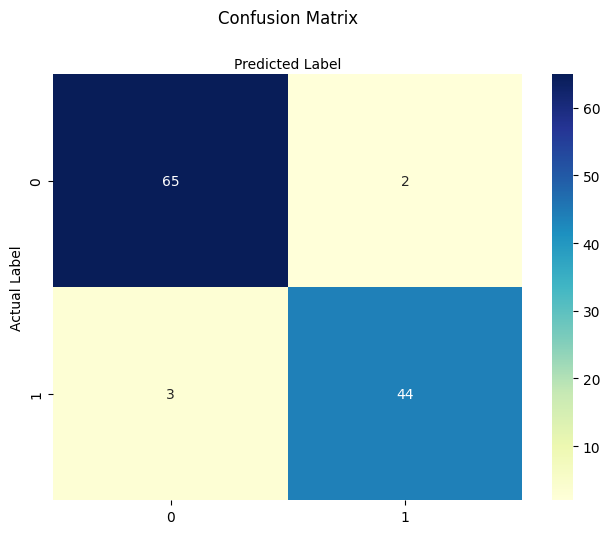

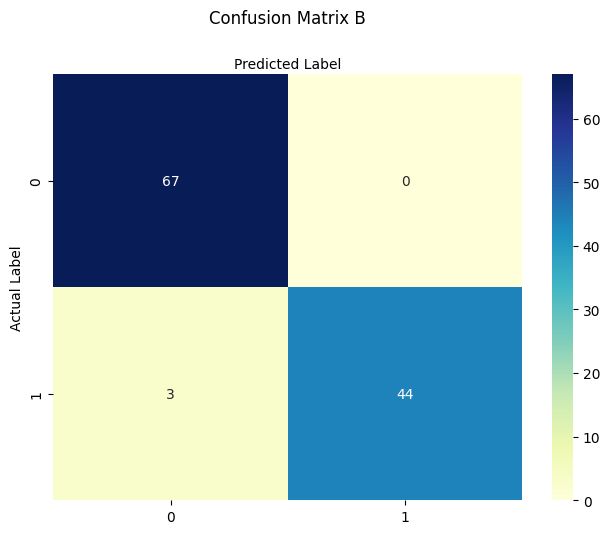

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from google.colab import drive
drive.mount('/content/drive')

file_path = '/content/drive/My Drive/cancer.csv'
cancer = pd.DataFrame(pd.read_csv(file_path))

cancer.isnull().sum()*100/cancer.shape[0]

cancer.head()

cancer.pop("id")
cancer.pop("Unnamed: 32")

cancer["diagnosis"] = cancer["diagnosis"].map({'M':1,'B':0})

np.random.seed(0)
df_train, df_test = train_test_split(cancer, train_size = 0.8)

y_train = df_train.pop("diagnosis").values
y_test = df_test.pop("diagnosis").values
x_train = df_train.values
x_test = df_test.values

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

classifier = LogisticRegression(random_state=0)
classifierb = LogisticRegression(random_state=0, penalty='l1', C=1, solver='saga')

classifier.fit(x_train, y_train)
classifierb.fit(x_train, y_train)

pred = classifier.predict(x_test)
predb = classifierb.predict(x_test)

cnf_matrix = confusion_matrix(y_test, pred)
cnf_matrixb = confusion_matrix(y_test, predb)

accuracy = metrics.accuracy_score(y_test, pred)
precision = metrics.precision_score(y_test, pred)
recall = metrics.recall_score(y_test, pred)
F1 = (2*precision*recall)/(precision+recall)
print('Accuracy A= ', accuracy)
print('Precision A= ', precision)
print('Recall A= ', recall)
print('F1 Score A= ', F1)

class_names = ['Benign','Malignant']
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap='YlGnBu', fmt='g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Confusion Matrix', y=1.1)
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')

accuracyb = metrics.accuracy_score(y_test, predb)
precisionb = metrics.precision_score(y_test, predb)
recallb = metrics.recall_score(y_test, predb)
F1b = (2*precisionb*recallb)/(precisionb+recallb)

print('Accuracy B = ', accuracyb)
print('Precision B = ', precisionb)
print('Recall B = ', recallb)
print('F1 Score B = ', F1b)

class_names = ['Benign','Malignant']
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cnf_matrixb), annot=True, cmap='YlGnBu', fmt='g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Confusion Matrix B', y=1.1)
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')